- Lakukan EDA untuk memahami dataset.
- Jelaskan mengenai insight yang didapat dari EDA!
<br><br>
- Untuk clustering, drop saja feature 'CustomerID' dan 'Gender', lalu cari kombinasi 2 feature terbaik berdasarkan silhouette score-nya yang selanjutnya akan digunakan untuk clustering.
- Gunakan metode K-Means, Agglomerative clustering, dan DBScan. Cari jumlah cluster paling optimal untuk tiap metode.
<br><br>
- Bandingkan hasil dari ketiga metode yang sudah dicoba, manakah metode yang terbaik? 
- Interpretasikan hasil clustering-nya!


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [8]:
print('Pengunjung mall dengan gender wanita sebesar', 112/200*100, '%')

Pengunjung mall dengan gender wanita sebesar 56.00000000000001 %


<AxesSubplot:xlabel='Gender', ylabel='Age'>

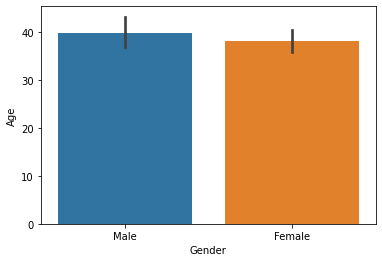

In [22]:
sns.barplot(data = df, x = 'Gender', y = 'Age')

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

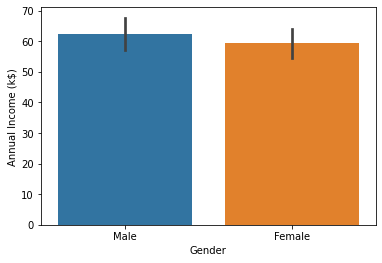

In [24]:
sns.barplot(data = df, x = 'Gender', y = 'Annual Income (k$)')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

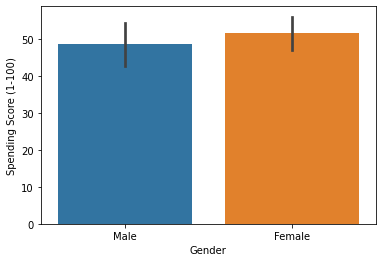

In [25]:
sns.barplot(data = df, x = 'Gender', y = 'Spending Score (1-100)')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

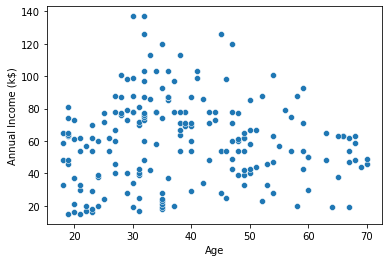

In [28]:
sns.scatterplot(df['Age'], df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

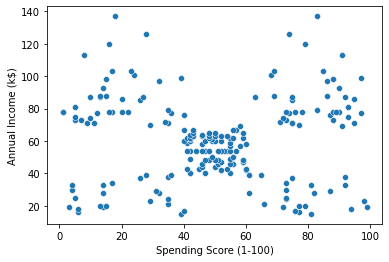

In [29]:
sns.scatterplot(df['Spending Score (1-100)'], df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

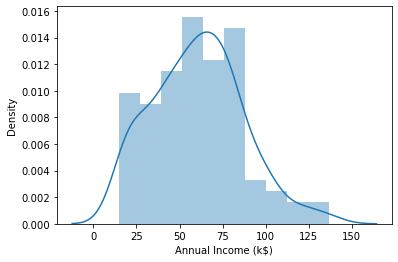

In [112]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

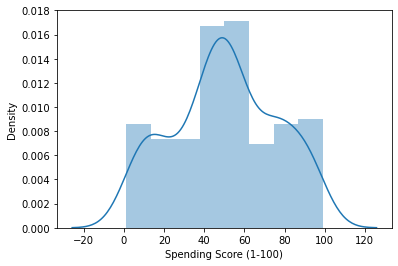

In [113]:
sns.distplot(df['Spending Score (1-100)'])

## Prep

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
dff = df.drop(columns=['CustomerID', 'Gender'])
dff.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Scaling

In [35]:
scaler = StandardScaler()
dff_scaled = scaler.fit_transform(dff)

In [42]:
dff_scaled = pd.DataFrame(dff_scaled)
dff_scaled.columns = dff.columns
dff_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [43]:
dff_scaled.rename(columns={
    'Annual Income (k$)': 'Income', 
    'Spending Score (1-100)': 'Spending Score'}, 
    inplace=True)

In [45]:
dff_scaled.head()

,Age,Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## A

In [68]:
ai = dff_scaled[['Age', 'Income']]
ags = dff_scaled[['Age', 'Spending Score']]
ins = dff_scaled[['Income', 'Spending Score']]

asd = [ai, ags, ins]
score = []
for i in asd:
    kmeans = KMeans(random_state=0)
    kmeans.fit(i)

    label = kmeans.labels_

    score.append(silhouette_score(i, label, metric = 'euclidean', random_state=0))

In [69]:
score

[0.39661913480838934, 0.4171736103265684, 0.45620041477955225]

In [73]:
ins

,Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [78]:
silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(ins)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(ins, labels, metric = 'euclidean', random_state=0))

Text(0, 0.5, 'Silhouette score')

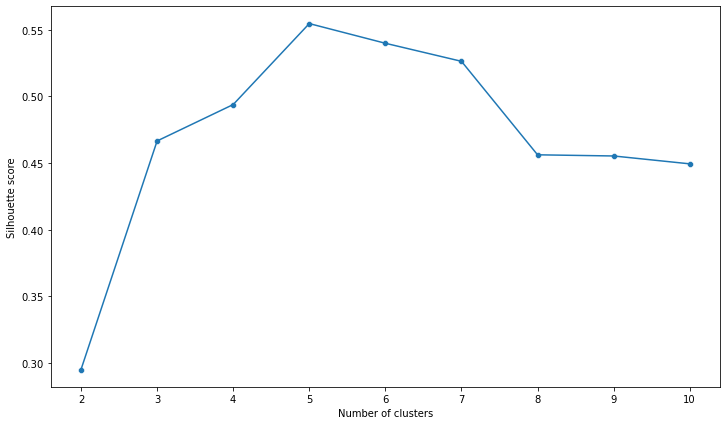

In [80]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

## Kmeans

In [82]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(ins)
labels = kmeans.labels_

In [83]:
ins['Cluster'] = labels
ins

,Income,Spending Score,Cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,3
...,...,...,...
195,2.268791,1.118061,4
196,2.497807,-0.861839,4
197,2.497807,0.923953,4
198,2.917671,-1.250054,4


Text(0, 0.5, 'Spending SCore')

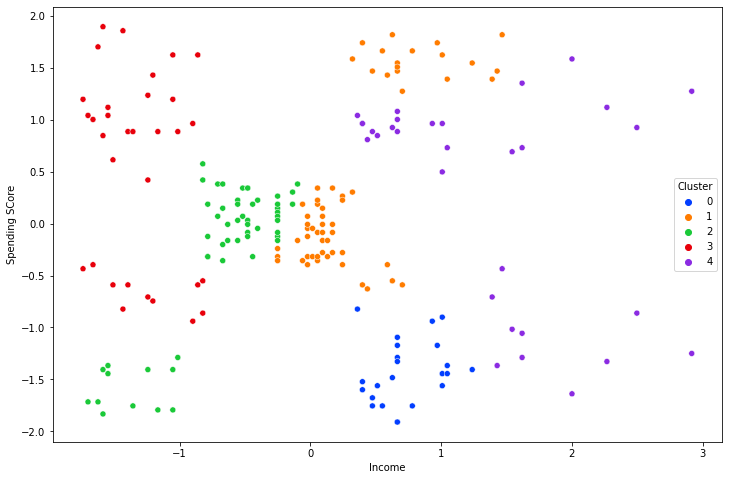

In [85]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data = ins,
    x = 'Income',
    y = 'Spending Score',
    hue = 'Cluster',
    palette = 'bright' 
)

plt.xlabel('Income')
plt.ylabel('Spending SCore')

# Agglomorative Clustering

## Dendogram: linkage ward

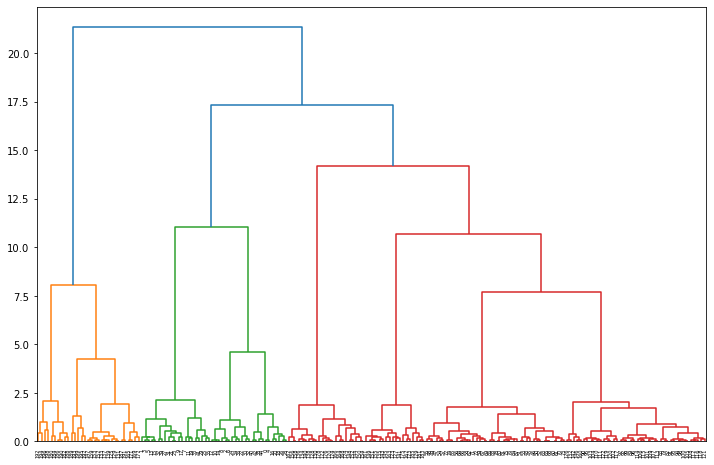

In [86]:
plt.figure(figsize=(12,8))
linkage_array = ward(ins)

dendrogram(linkage_array)

plt.show()

1. 2 Cluster: 22.5
2. 3 Cluster: 17.5
3. 4 Cluster: 14
4. 5 Cluster: 11

Cluster 2 ke 3 berjarak 5 (paling besar), maka cluster 2 yang dipilih


## Dendogram: linkage average

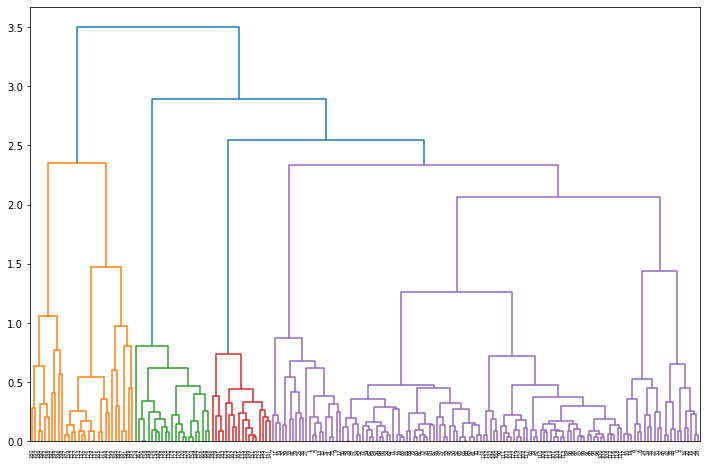

In [87]:
plt.figure(figsize=(12,8))
linkage_array = average(ins)

dendrogram(linkage_array)

plt.show()

## Dendogram: linkage complete

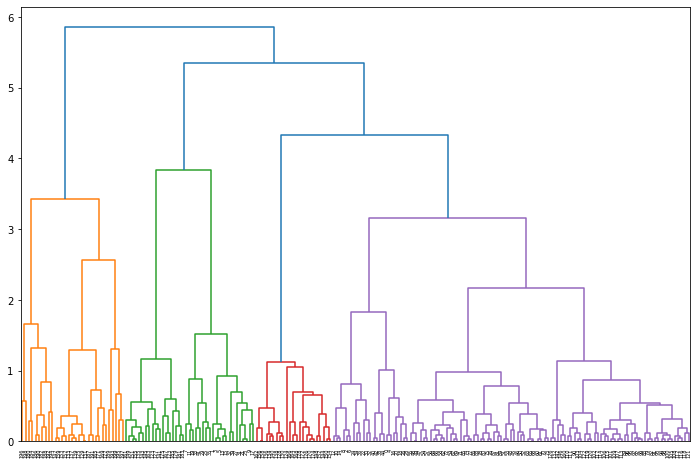

In [89]:
plt.figure(figsize=(12,8))
linkage_array = complete(ins)

dendrogram(linkage_array)

plt.show()

In [90]:
inss = ins

In [95]:
clust_ward = AgglomerativeClustering(linkage = 'ward', n_clusters = 2)
inss['hasil ward'] = clust_ward.fit_predict(inss)

clust_avg = AgglomerativeClustering(linkage = 'average', n_clusters = 2)
inss['hasil average'] = clust_avg.fit_predict(inss)

clust_complete = AgglomerativeClustering(linkage = 'complete', n_clusters = 4)
inss['hasil complete'] = clust_complete.fit_predict(inss)

In [92]:
inss

,Income,Spending Score,Cluster,hasil ward,hasil average,hasil complete
0,-1.738999,-0.434801,3,0,0,0
1,-1.738999,1.195704,3,0,0,0
2,-1.700830,-1.715913,2,0,0,0
3,-1.700830,1.040418,3,0,0,0
4,-1.662660,-0.395980,3,0,0,0
...,...,...,...,...,...,...
195,2.268791,1.118061,4,1,1,1
196,2.497807,-0.861839,4,1,1,1
197,2.497807,0.923953,4,1,1,1
198,2.917671,-1.250054,4,1,1,1


## Visualization

Text(0, 0.5, 'Spending Score')

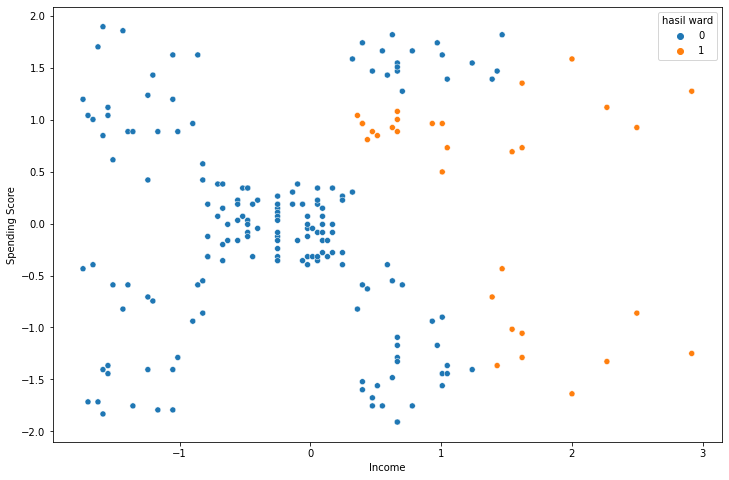

In [94]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data = inss,
    x = 'Income',
    y = 'Spending Score',
    hue = 'hasil ward'
)

plt.xlabel('Income')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

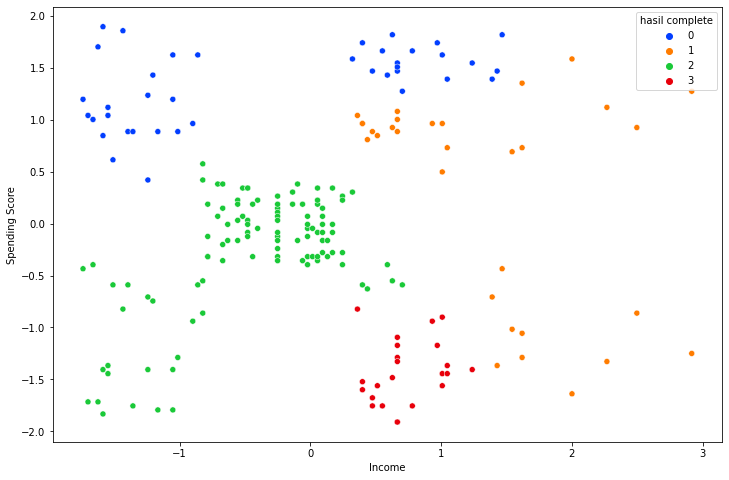

In [97]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data = inss,
    x = 'Income',
    y = 'Spending Score',
    hue = 'hasil complete',
    palette = 'bright'
)

plt.xlabel('Income')
plt.ylabel('Spending Score')

## DBSCAN

In [100]:
for eps in [0.6, 0.65, 0.7]:
    for ms in [3, 4, 5, 6]:
        
        print('epsilon', eps)
        print('min smaples', ms)
        
        dbscan = DBSCAN(eps = eps, min_samples = ms)
        label = dbscan.fit_predict(ins)
        print('score', silhouette_score(ins, label))

        print('\n')

epsilon 0.6
min smaples 3
score 0.7001646145860398


epsilon 0.6
min smaples 4
score 0.6816226382364718


epsilon 0.6
min smaples 5
score 0.6816226382364718


epsilon 0.6
min smaples 6
score 0.6753683928603859


epsilon 0.65
min smaples 3
score 0.6999172292523471


epsilon 0.65
min smaples 4
score 0.6898713006216923


epsilon 0.65
min smaples 5
score 0.6816226382364718


epsilon 0.65
min smaples 6
score 0.6816226382364718


epsilon 0.7
min smaples 3
score 0.6999172292523471


epsilon 0.7
min smaples 4
score 0.6999172292523471


epsilon 0.7
min smaples 5
score 0.6999172292523471


epsilon 0.7
min smaples 6
score 0.6898713006216923




In [101]:
dbscan = DBSCAN(eps = 0.6, min_samples = 3)
label = dbscan.fit_predict(ins)
label

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 4, 5, 6, 7, 6, 7,
       4, 7, 6, 5, 6, 7, 6, 7, 6, 5, 4, 5, 6, 5, 4, 7, 6, 5, 6, 5, 6, 7,
       6, 5, 6, 7, 6, 7, 4, 5, 6, 5, 6, 7, 6, 5, 6, 7, 6, 7, 6, 5, 6, 5,
       6, 7, 6, 5, 8, 5, 8, 5, 8, 5, 8, 7, 8, 9, 8, 7, 8, 9, 8, 9, 8, 9,
       8, 9], dtype=int64)

In [108]:
ins

,Income,Spending Score,Cluster,hasil ward,hasil average,hasil complete,cluster,cluster DB
0,-1.738999,-0.434801,3,0,0,2,0,0
1,-1.738999,1.195704,3,0,0,0,1,1
2,-1.700830,-1.715913,2,0,0,2,2,2
3,-1.700830,1.040418,3,0,0,0,1,1
4,-1.662660,-0.395980,3,0,0,2,0,0
...,...,...,...,...,...,...,...,...
195,2.268791,1.118061,4,1,1,1,9,9
196,2.497807,-0.861839,4,1,1,1,8,8
197,2.497807,0.923953,4,1,1,1,9,9
198,2.917671,-1.250054,4,1,1,1,8,8


Text(0, 0.5, 'Spending Score')

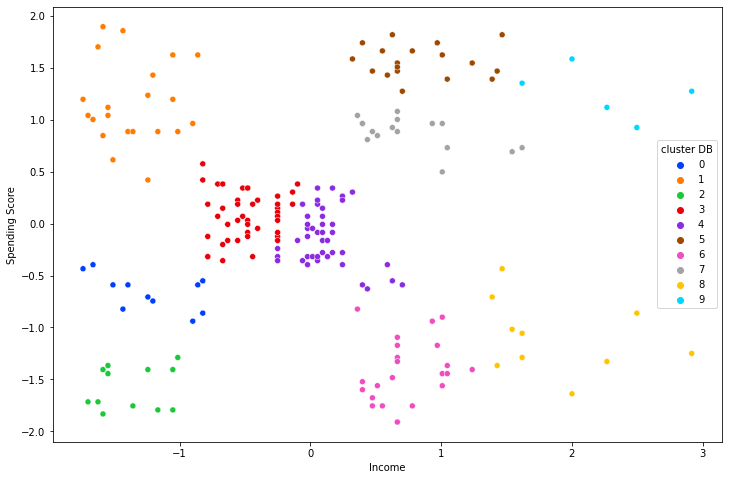

In [109]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data = inss,
    x = 'Income',
    y = 'Spending Score',
    hue = 'cluster DB',
    palette = 'bright'
)

plt.xlabel('Income')
plt.ylabel('Spending Score')